# Fashion Recommendation System using Images

* A Fashion Recommendation System with Image Features uses computer vision and machine learning techniques to assess the visual elements of fashion goods (such as color, texture, and style) and propose comparable or complimentary products to customers. 

# Steps:

* Assemble a diverse dataset of fashion items. This dataset should include a wide variety of items with different colours, patterns, styles, and categories.

* Ensure all images are in a consistent format (e.g., JPEG, PNG) and resolution.

* Implement a preprocessing function to prepare images for feature extraction.

* Choose a pre-trained CNN model such as VGG16, ResNet, or InceptionV3. These models, pre-trained on large datasets like ImageNet, are capable of extracting powerful feature representations from images.

* Pass each image through the CNN model to extract features. Define a metric for measuring the similarity between feature vectors. 

* Rank the dataset images based on their similarity to the input image and recommend the top N items that are most similar.

* Implement a final function that encapsulates the entire process from pre-processing an input image, extracting features, computing similarities, and outputting recommendations.

In [6]:
import os

extraction_directory = r'C:\Users\pradh\Downloads\women-fashion\women fashion'

# List the files directly in the extraction directory
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])  # Print first 10 files to verify

# If you want to list files within 'women fashion' directory, you don't need to join again
extraction_directory_updated = extraction_directory  # No need to join again
extracted_files_updated = os.listdir(extraction_directory_updated)
print(extracted_files_updated[:10])  # Print first 10 files to verify


['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg', 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg']
['anarkali suit with a long, olive green kurta adorned with intricate embroidery aroun

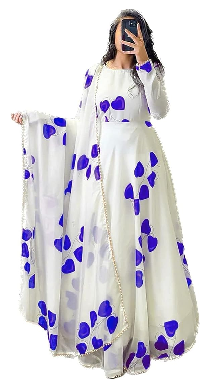

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[1])
display_image(first_image_path)

* Now, we'll make a list of all picture file locations that will be used later to extract features from each image in the dataset:

In [8]:
import glob

# directory path containing your images
image_directory = r'C:\Users\pradh\Downloads\women-fashion\women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

print(image_paths_list)

['C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\Anarkali suit with a modern twist.jpg', 'C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'C:\\Users\\pradh\\Downloads\\women-fashion\\women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'C:\\Users\\pradh\\Downloads\\women-fa

* In the above code, the glob module is used to build a list of file paths for photos in the directory. The glob.glob function looks for files that match a specific pattern, in this example *.*, which includes all files in the directory. The list comprehension then selects just files with particular image file extensions (.jpg,.png,.jpeg,.webp). 
It guarantees that images_paths_list only contains paths to image files, not any other file types that may be present in the directory.

In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [10]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

58900480/58889256 [==============================] - 13s 0us/step


In [11]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

In [12]:
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [14]:
all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

* In the following code, the VGG16 model, a famous convolutional neural network pre-trained on the ImageNet dataset, is used to extract visual attributes from photos saved in image_paths_list.

* Each image path from image_paths_list is processed through a number of steps: the image is loaded, shrunk to 224×224 pixels to meet the VGG16 input size requirements, transformed to a NumPy array, and preprocessed to fit the model's required input format.

* The preprocessed photos are then sent into the VGG16 model, which extracts features before flattening and normalizing them to produce a consistent feature vector for each image. These feature vectors (all_features) and their accompanying picture filenames (all_image_names) are saved, resulting in a structured dataset for the following steps in developing a fashion recommendation system with image features.

In [15]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

* In the preceding code, we developed the function recommend_fashion_items_cnn, which uses deep learning-based feature extraction to recommend fashion items that are comparable to the input picture. It uses the VGG16 model to extract high-dimensional feature vectors from photos and capture their visual essence.

* The function preprocesses an input picture, extracts its features, and computes the cosine similarity of this feature vector to those of other images in the dataset (all_features). It rates these photos based on similarity and recommends the top N most similar images, expressly omitting the input image by filtering out its index from the list of comparable indices.

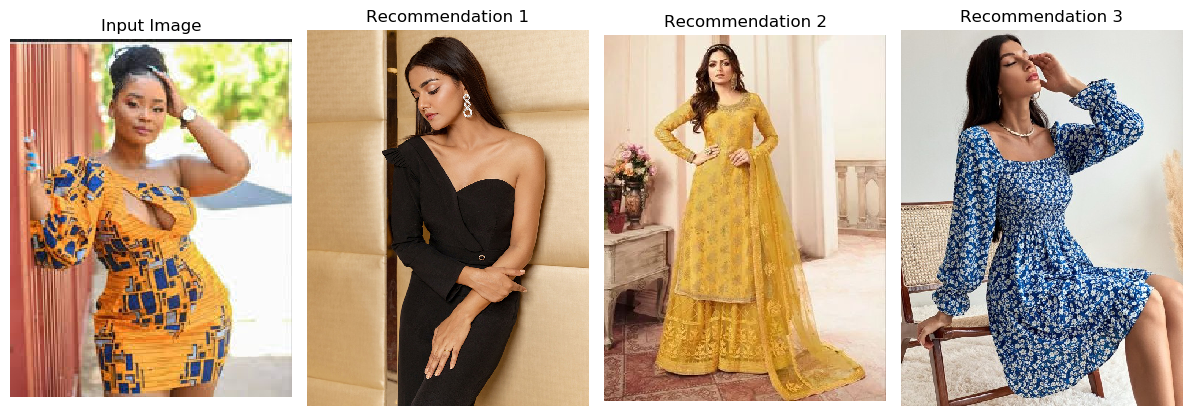

In [20]:
input_image_path = r'C:\Users\pradh\Downloads\women-fashion\women fashion\form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)